## Spectral Clustering and Semi-Supervised Learning

#### This notebook contains different values and imports that can be used in this practical session.
#### Please keep the same variable names when provided in your report to make the work of teaching assistants easier. 
#### You can still change the values given or the sizes of the datasets treated if you believe it is usefull to illustrate your point.

#### You can directly edit the markdown boxes to add your comments and answers to the questions

In [1]:
# Question 1 (imports and advised values):
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx
import numpy as np

n_samples = 200 # You can change these values
noise_level_list = [.05,.1,.2] # You can change these values

### Question 1 : Complete the code in the box below

In [2]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.2)

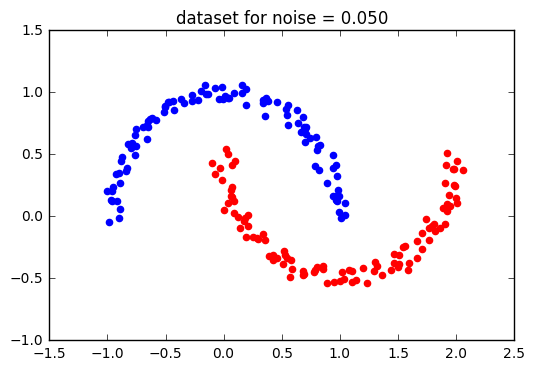

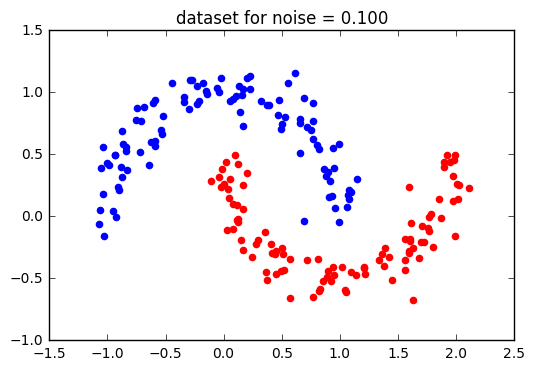

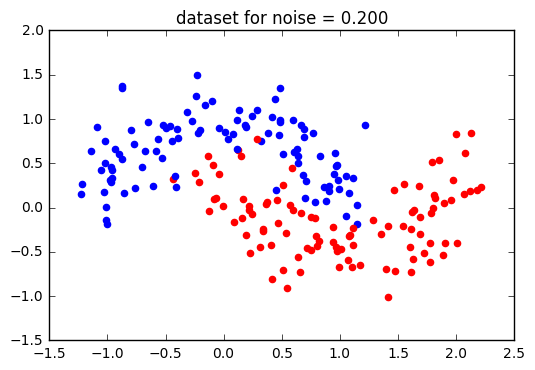

In [3]:
def plot_graph(x):
    colors = ['blue', 'red']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    noisy_moons = make_moons(n_samples = n_samples, noise = x)
    for i in range(len(noisy_moons[0])):
        ax.scatter(noisy_moons[0][i, 0]
                   , noisy_moons[0][i, 1]
                   , color = colors[noisy_moons[1][i]])
    plt.title('dataset for noise = %.3f' %x)
for n in noise_level_list:
    plot_graph(n)

In [4]:
# Question 2 :
from sklearn.neighbors import kneighbors_graph
n_neighbors_list = [1,5,10] # You can change these values

### Question 2 : Complete the code in the box below

In [5]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.02)
A = []
for i in range(3):
    A.append(kneighbors_graph(noisy_moons[0], n_neighbors_list[i], mode = 'connectivity', include_self=True))
A[1].toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.]])

Visualize the graph

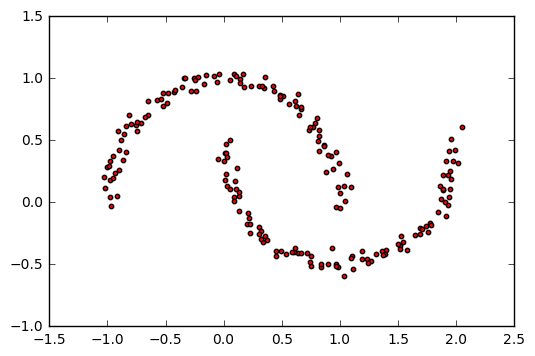

In [6]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.04)
pos = {}
for i in range(len(noisy_moons[0])):
    pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

A = kneighbors_graph(noisy_moons[0]
                     , 1
                     , mode = 'connectivity', include_self=True)
G = nx.from_numpy_matrix(A.toarray())

nx.draw_networkx(G, pos, node_size=10, with_labels=False)

Plot several graphs for different values of noise and neighbors

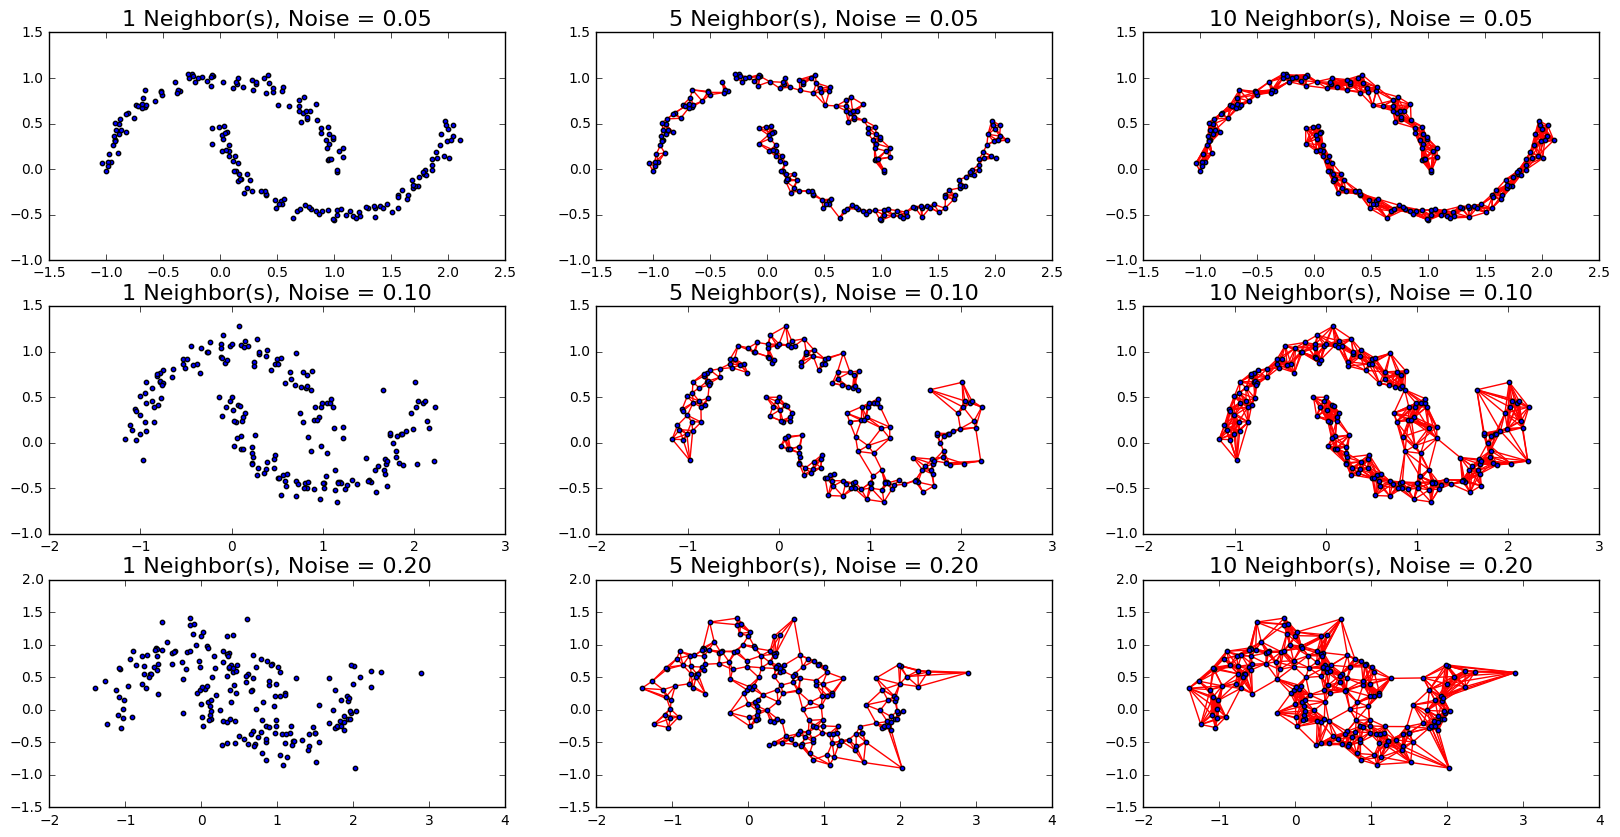

In [7]:
grid1 = []
grid2 = []

plt.figure(figsize=(20.0, 10.0))

for n in noise_level_list:
    
    noisy_moons = make_moons(n_samples = n_samples, noise = n)
    
    for neighbors in n_neighbors_list:
    
        pos = {}
        for i in range(len(noisy_moons[0])):
            pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

        A = kneighbors_graph(noisy_moons[0]
                             , neighbors
                             , mode = 'connectivity', include_self=True)
        G = nx.from_numpy_matrix(A.toarray())

        grid1.append(G)
        grid2.append(pos)

noise_custom = []
for i in range(len(noise_level_list)*3):
    noise_custom.append(noise_level_list[int(i/3)])
    
for i in range(len(noise_level_list)*len(n_neighbors_list)):
    nx.draw_networkx(grid1[i], grid2[i] , edge_color = 'r', node_color = 'b', node_size=10, with_labels=False, ax=plt.subplot(len(noise_level_list),len(n_neighbors_list),i+1))
    plt.title("%1.f Neighbor(s), Noise = %0.02f" %(n_neighbors_list[i%3],noise_custom[i]) , fontsize=16)

In [8]:
# for n in noise_level_list:
    
#     noisy_moons = make_moons(n_samples = n_samples, noise = n)
    
#     for neighbors in n_neighbors_list:
    
#         pos = {}
#         for i in range(len(noisy_moons[0])):
#             pos[i] = (noisy_moons[0][i][0], noisy_moons[0][i][1])

#         A = kneighbors_graph(noisy_moons[0]
#                              , neighbors
#                              , mode = 'connectivity', include_self=True)
#         G = nx.from_numpy_matrix(A.toarray())

#         nx.draw_networkx(G, pos, node_size=10, with_labels=False)

Adjacency matrix

In [9]:
from matplotlib import pyplot, patches
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

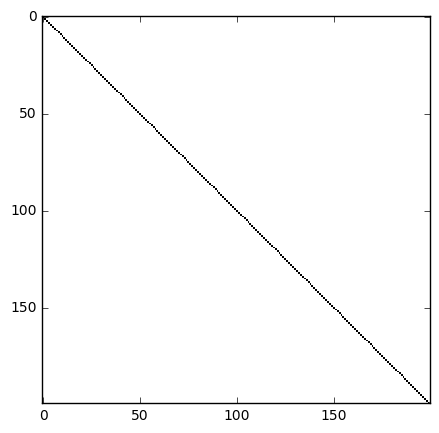

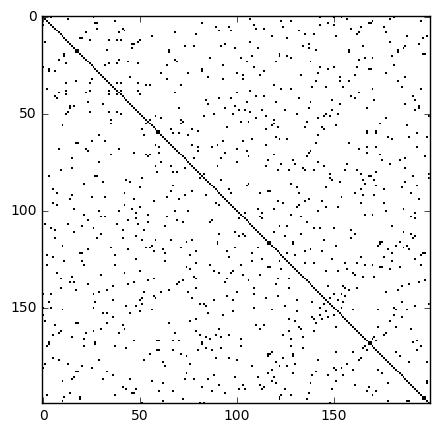

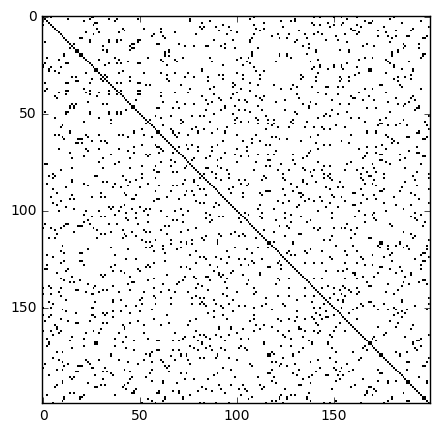

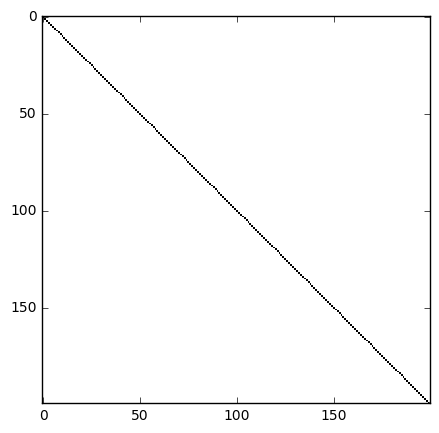

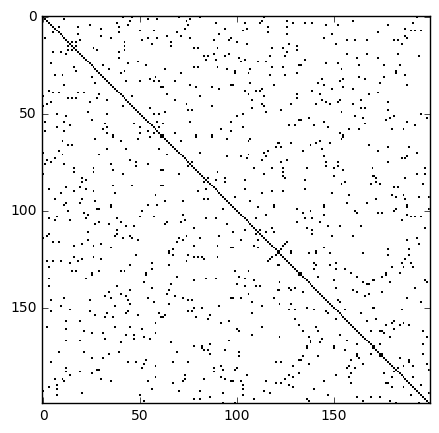

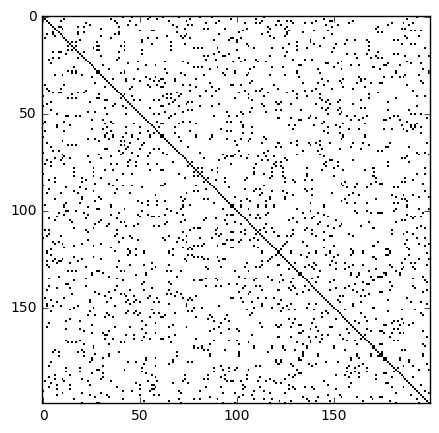

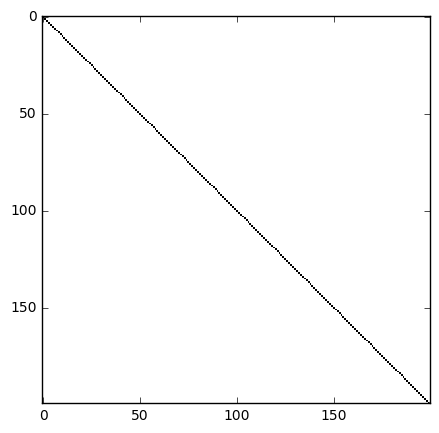

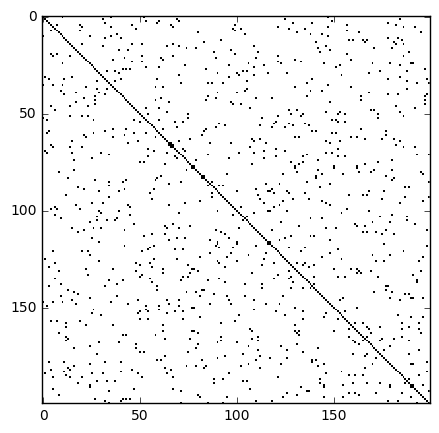

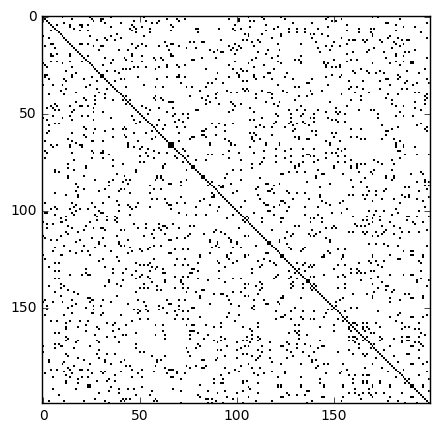

In [10]:
for n in noise_level_list:
    
    noisy_moons = make_moons(n_samples = n_samples, noise = n)
    A = []
    for i in range(len(n_neighbors_list)):
        A.append(kneighbors_graph(noisy_moons[0], n_neighbors_list[i], mode = 'connectivity', include_self=True))

    for i in range(len(n_neighbors_list)):
        G = nx.from_scipy_sparse_matrix(A[i])
        draw_adjacency_matrix(G)      

### Question 3 : Optimization problem 

- $vol(V) = f^TDf$

- $f^TLf = vol(V)Ncut(A, B)$

- solve $min_{f \in R^n}\frac{f^TLf}{f^TDf}$ subject to $f^TD1_n = 0$

### Question 4 : Complete the code in the box below



In [11]:
from sklearn.cluster import SpectralClustering

In [12]:
noisy_moons = make_moons(n_samples = n_samples, noise = 0.02)
# A = kneighbors_graph(noisy_moons[0], n_neighbors_list[1]
#                  , mode = 'connectivity', include_self=True)
X = noisy_moons[0]

In [13]:
model = SpectralClustering(n_clusters = 2)
model.fit(X)
data = model.fit_predict(X)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


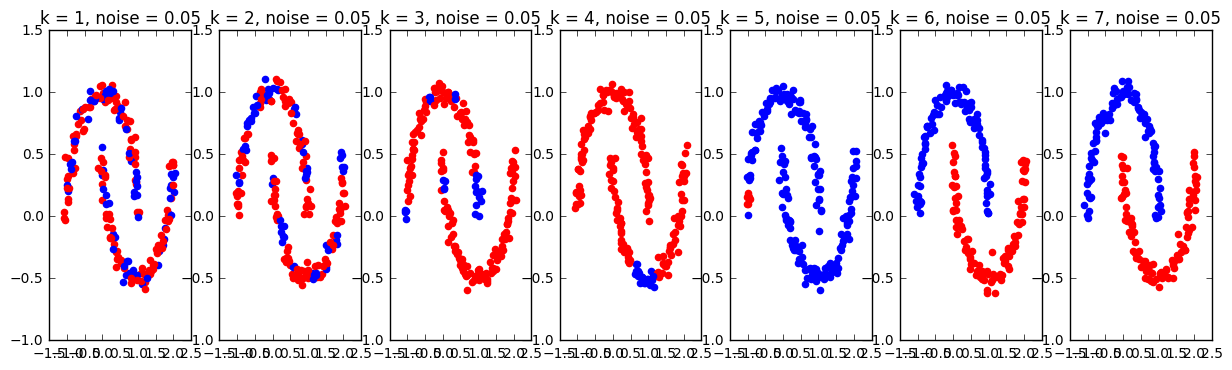

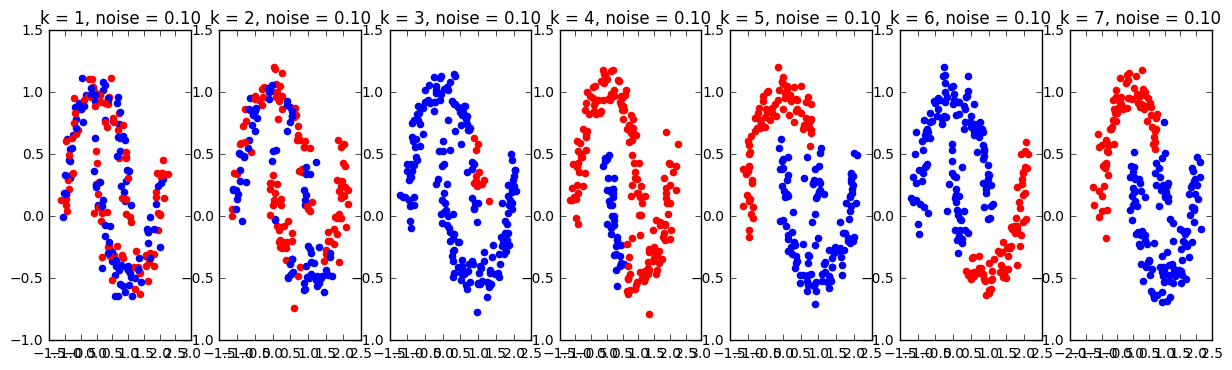

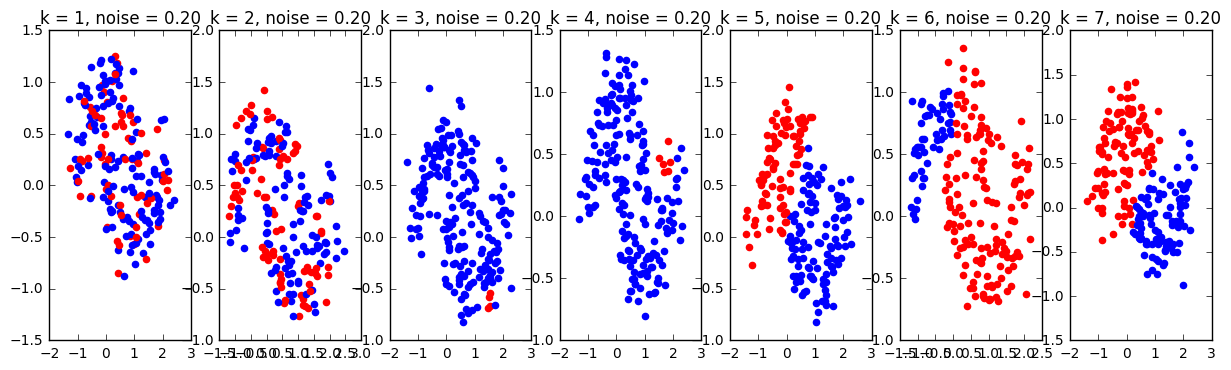

In [14]:
def plot_cluster(noise, cluster, neighbors_max):
    fig = plt.figure(figsize=(15.0,4.0))
    
    
    # Loop on different neighbors number, and plot for each of them
    for i in range(neighbors_max):
    
        model = SpectralClustering(n_clusters = cluster, affinity = 'nearest_neighbors'
                                   , n_neighbors = i + 1)
        X = make_moons(n_samples = n_samples, noise = noise)
        model.fit(X[0])
        data = model.fit_predict(X[0])
        colors = ['blue', 'red', 'green', 'pink', 'grey', 'orange', 'gold']
        ax = fig.add_subplot(1,neighbors_max, i+1)
        for j in range(len(X[0])):
            ax.scatter(X[0][j, 0]
                       , X[0][j, 1]
                       , color = colors[data[j]])
        plt.title('k = %1.f, noise = %.02f' %(i+1,noise))
#     model.affinity
    
# for i in range(10):
#     plot_cluster(0.05, 2, i + 1)
for nois in noise_level_list:
    plot_cluster(nois, 2, 7)

### Question 5 : Complete the code in the box below

We first define functions to compute similarities

In [15]:
def similarity(C_1, C_2):
    return (C_1*C_2).sum() / np.sqrt((C_1*C_1).sum() * (C_2*C_2).sum())

def compute_C(clustering):
    
    elements = {}
    
    for element in set(clustering):
        
        elements[element] = []
        
        for i in range(len(clustering)):
            
            if clustering[i] == element:
                elements[element].append(i)
                
    C = np.zeros((len(clustering), len(clustering)))
    
    for i in elements.keys():
        
        for j in range(len(elements[i])):
            
            for k in range(len(elements[i])):
                if j != k:
                    C[j, k] = 1
    return C

Then, we implement the algorithm from the given paper

In [20]:
# Define parameters
f = 0.8
k_max = 20
noise = 0.001
C = 3
B = 10
S = np.zeros((B, k_max+1))


def stability(algo, dataset, B, C):
    # Create initial dataset
#     X = make_moons(n_samples = n_samples, noise = noise)[0]
    S = np.zeros((B, k_max+1))
    bootstrap = []

    # Bootstrap on the initial dataset
    for i in range(B):
        idx = np.random.randint(len(dataset), size=f*len(dataset))
        bootstrap.append([dataset[idx, :], idx])

    # Loop on different values of clusters
    for k in range(2, k_max + 1):

        # clustering for initial X
        model = algo(n_clusters = C, affinity = 'nearest_neighbors'
                                   , n_neighbors = k)   
        model.fit(dataset)
        clustering_X = model.fit_predict(dataset)

        for i in range(B):

            # clustering for boostrapped partition
            model = algo(n_clusters = C, affinity = 'nearest_neighbors'
                                       , n_neighbors = k)
            model.fit(bootstrap[i][0])
    #         affinity = model.affinity_matrix_
            clustering = model.fit_predict(bootstrap[i][0])
            C_bootstrap = compute_C(clustering)

            # We take the same points in initial as in the bootstrapped to have the 
            # same number of points
            C_initial = compute_C(clustering_X[bootstrap[i][1]])

            S[i, k] = similarity(C_bootstrap, C_initial)
            
    return S

### Question 6 : Complete the code in the box below

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


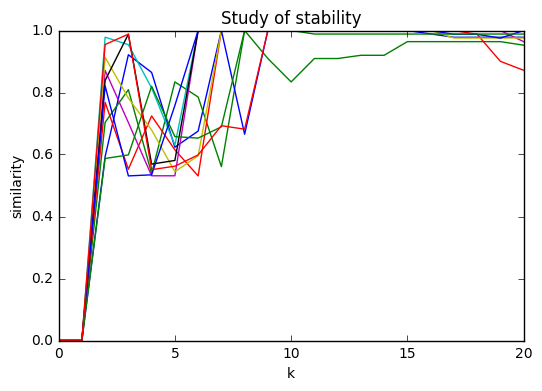

In [21]:
dataset = make_moons(n_samples = n_samples, noise = 0.001)[0]
S = stability(SpectralClustering, dataset, 10, 2)

for i in range(S.shape[0]):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


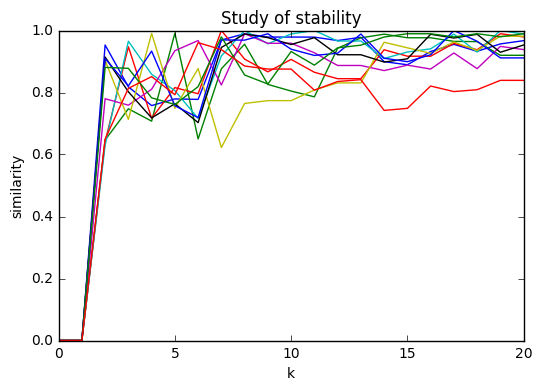

In [19]:
dataset = make_moons(n_samples = n_samples, noise = 0.5)[0]
S = stability(SpectralClustering, dataset, 10, 2)

for i in range(S.shape[0]):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

### Question 7 : Complete the code in the box below

In [19]:
from sklearn.cluster import AgglomerativeClustering
c_max = 5
def stability_agglo(algo, dataset, B):
    # Create initial dataset
#     X = make_moons(n_samples = n_samples, noise = noise)[0]
    bootstrap = []

    # Bootstrap on the initial dataset
    for i in range(B):
        idx = np.random.randint(len(dataset), size=f*len(dataset))
        bootstrap.append([dataset[idx, :], idx])

    # Loop on different values of clusters
    for k in range(2, c_max + 1):

        # clustering for initial X
        model = algo(n_clusters = k, affinity = 'euclidean')   
        model.fit(dataset)
        clustering_X = model.fit_predict(dataset)

        for i in range(B):

            # clustering for boostrapped partition
            model = algo(n_clusters = k, affinity = 'euclidean')
            model.fit(bootstrap[i][0])
    #         affinity = model.affinity_matrix_
            clustering = model.fit_predict(bootstrap[i][0])
            C_bootstrap = compute_C(clustering)

            # We take the same points in initial as in the bootstrapped to have the 
            # same number of points
            C_initial = compute_C(clustering_X[bootstrap[i][1]])

            S[i, k] = similarity(C_bootstrap, C_initial)
            
    return S

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


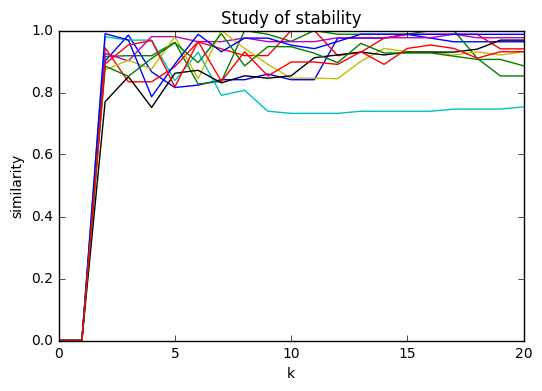

In [21]:
dataset = make_moons(n_samples = n_samples, noise = 0.5)[0]
S = stability_agglo(AgglomerativeClustering, dataset, 10)

for i in range(10):
    plt.plot(S[i])
    plt.xlabel('k')
    plt.ylabel('similarity')
    plt.title('Study of stability')

### Experiment on MNIST

In [22]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [23]:
mnist.data.shape, mnist.target.shape, np.unique(mnist.target)

((70000, 784),
 (70000,),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]))

In [24]:
# Stratified sampling

f = 0.1 #degree of sampling
# Initialization
old = 0
new = list(mnist.target).index(1)
idx = np.random.randint(old, new, size=f*(new - old))
X = mnist.data[idx, :]
y = mnist.target[idx]

# Take f% of all classes
for i in list(np.unique(mnist.target))[1:-1]:
    new = list(mnist.target).index(i+1)
    idx = np.random.randint(old, new, size=f*(new - old))
    
    X = np.concatenate((X, mnist.data[idx, :]))
    y = np.concatenate((y, mnist.target[idx]))
    
    old = new
    

C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [25]:
model = SpectralClustering(n_clusters = 10)
model.fit(X)
data = model.fit_predict(X)

C:\Users\Peter martigny\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [26]:
np.sum(data - y != 0), len(X)

(4816, 5994)

## Semi-Supervised Learning

Choice of the dataset used : **Precise** which dataset you chose and why it is relevant for the semi-supervised learning Task

Advised datasets :

*Breast Cancer Wisconsin (Diagnostic) Database*

*MNIST binary even vs odd (multiple clusters inside each class)*

Feel free to use other datasets if they are relevant

In [23]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.cross_validation import train_test_split


### For all the next questions, use Cancer and Mnist classes to handle your data if you choose to use these one,
### You can also add more datasets but we advise you to handle them with this class for better readability
class semi_sup_dat:
    def __init__(self,data,p_unlabelled,name):
        # DON T CHANGE THE RANDOM STATES
        self.name = name
        if self.name == 'Mnist':
            # do an even vs odd binary classification :
            even = [0,2,4,6,8]
            Y = [int(y in even) for y in data.target]
        else:
            Y = data.target
        X_lab, X_unlab, y_lab, y_unlab = train_test_split(data.data, data.target, test_size=p_unlabelled, random_state=32)
        self.X_lab = X_lab
        self.X_unlab = X_unlab
        self.y_lab = y_lab
        self.y_unlab = y_unlab


# The following lines can be called later in the code to build a dataset with varying unlabelled proportion
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
digits = load_digits()

Mnist = semi_sup_dat(load_digits(), p_unlabelled,'Mnist')

We will work with Breast Cancer Wisconsin (Diagnostic) Database

In [24]:
Cancer.X_lab.shape, Cancer.X_unlab.shape, Cancer.y_lab.shape, Cancer.y_unlab.shape

((113, 30), (456, 30), (113,), (456,))

### Question 9 : Complete the code in the box below

In [25]:
#  Question 9  : Complete the function self_training
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

S = [Cancer.X_lab, Cancer.y_lab]
U = [Cancer.X_unlab, Cancer.y_unlab]

while len(U[0]) != 0:
    
#     print('eval len before change: ', len(U[1]))
    
    # Compute model at k
    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(S[0], S[1])

    # Select the most trusted elements
    proba = model.predict_proba(U[0])
    proba = pd.DataFrame(proba)
    pred = model.predict(U[0])

    m = max(proba[0].max(), proba[1].max())
    target = proba[(proba[0] == m) | (proba[1] == m)]
    notarget = proba[(proba[0] != m) & (proba[1] != m)]

    # Update S_0
    # print(S[0].shape)
    S[0] = np.concatenate((S[0], U[0][target.index]))
    S[1] = np.concatenate((S[1], pred[target.index]))
#     print('index on which we are pretty sure: ', len(U[0][target.index]))
    # print(S[0].shape)

    # Update U
    U[0] = U[0][notarget.index]
    U[1] = U[1][notarget.index]

    model_new = KNeighborsClassifier(n_neighbors = 5)
    model_new.fit(S[0], S[1])
#     model.fit(S[0], S[1])

    clusters = model_new.predict(U[0])
#     clusters_new = model_new.predict(U[0])
    print(np.sum(clusters == U[1])/len(clusters), len(clusters))

#     C_1 = compute_C(clusters)
#     C_2 = compute_C(clusters_new)

#     # similarity = similarity(C_1, C_2)
#     print((C_1*C_2).sum() / np.sqrt((C_1*C_1).sum() * (C_2*C_2).sum()))

0.564516129032 62
0.615384615385 39
0.636363636364 33
0.6 30
0.62962962963 27
0.64 25
0.545454545455 11
0.5 10
0.375 8


ValueError: Found array with 0 sample(s) (shape=(0, 30)) while a minimum of 1 is required.

In [30]:
S[0].shape, Cancer.X_unlab.shape

((569, 30), (456, 30))

In [31]:
np.concatenate((S[1], pred[target.index])).shape

(577,)

### Question 10 : Complete the code in the box below

###### Closed form expression :

-

-

-

In [36]:
from sklearn.metrics.pairwise import rbf_kernel # Or reimplement it yourself if your prefer
from scipy.linalg import block_diag
x = np.array([[1, 0], [0, 1]])
block_diag(x, x)




array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### Question 11 : Complete the code in the box below

In [139]:
import time


S = [Cancer.X_lab, Cancer.y_lab]
U = [Cancer.X_unlab, Cancer.y_unlab]


# def l_2(x, y):
#     return np.sum((x - y)**2)

u = len(S[0])
l = len(U[0])

gamma_a = 1 # Reg
gamma = 1 # gamma in K
X = np.concatenate((S[0], U[0]))

def optim_gamma(gamma_i):
# gamma_i = 1 # Laplace reg



    # define J
    J = np.zeros((len(X), len(X)))
    for i in range(u):
        J[i, i] = 1

    # Define K
    K = rbf_kernel(X, gamma=gamma)

    # Define L
    D = np.diag(np.sum(K, axis=1))
    L = D - K

    # Define 1 column
    unity = np.zeros((u + l, ))
    for i in range(u):
        unity[i] = 1

    # Define Y
    Y = np.zeros((u + l, ))
    for i in range(u):
        Y[i] = S[1][i]

    # Define F
    F = J.dot(K) + gamma_a*l*np.identity(u + l) + ((gamma_i)/(u + l)**2)*L.dot(K)
    # H = np.linalg.cholesky(F)
    
    # Invert the matrix
    inv = np.linalg.inv(F)

    # Get the closed form result
    alpha = inv.dot(Y)

    return alpha

In [142]:
A = []
gam = [0, 0.5, 1, 5, 2000]

for g in gam:
    A.append(optim_gamma(g))

In [143]:
for i in range(len(A)):
    print('Norm of alpha: ', np.linalg.norm(A[i],0), i)
    print()

Norm of alpha:  77.0 0

Norm of alpha:  329.0 1

Norm of alpha:  330.0 2

Norm of alpha:  330.0 3

Norm of alpha:  330.0 4



### Question 12 : Add your answer here

- When using the closed form, we invert a matrix, which is very poorly scalable.

-

-

### Question 13 : Complete the code in the box below

In [231]:
S = [Cancer.X_lab, Cancer.y_lab]
U = [Cancer.X_unlab, Cancer.y_unlab]

u = len(S[0])
l = len(U[0])

gamma_i = 1
gamma_a = 1 # Reg
gamma = 1 # gamma in K
X = np.concatenate((S[0], U[0]))
Y = np.concatenate((S[1], U[1]))
step = 1
n_iter = 6000
alpha = np.random.normal(loc = 0, scale = 1, size = len(X))
# gradients = np.zeros((n_iter, l + u))
grad_norm = np.zeros((n_iter))

for i in range(n_iter):
    
    j = np.random.randint(1, l + u)
    
    if j <= l:
        
        grad = -2*K[j, :]*(Y[j] - np.dot(K[j, :], alpha)) 
        + 2*gamma_a*K.dot(alpha) + 2*(gamma_i/(u + l)**2)*K.dot(L.dot(K.dot(alpha)))
        
    else:
        grad = 2*K[j, :]*np.dot(K[j, :], alpha)
        + 2*gamma_a*K.dot(alpha) + 2*(gamma_i/(u + l)**2)*K.dot(L.dot(K.dot(alpha)))

    alpha -= (step)*grad/l
#     gradients[i] = grad
    grad_norm[i] = np.linalg.norm(grad)
    
        

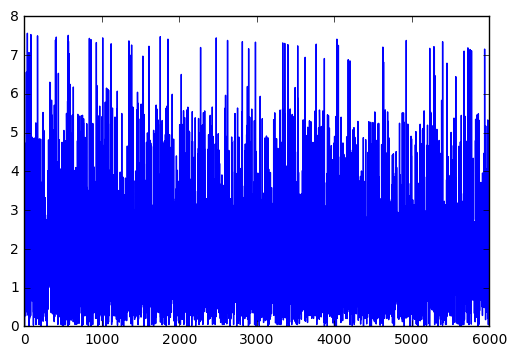

In [232]:
plt.plot(grad_norm)

### Question 14 : Complete the code in the box below

##### Add your answer to the question here :

-

-

-

### Question 15 : Complete the code in the box below

### Question 16 : Complete the code in the box below

###### Describe your protocol here : 
-

-

-